In [2]:
from sklearn.datasets import make_regression
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
from ipykernel import kernelapp as app

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
ls = pd.read_csv("lending_club_data.csv")

C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
#grade to integer 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(ls["sub_grade"].value_counts().index.sort_values())
le.classes_
ls["trs_grade"]=le.transform(ls["sub_grade"])

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [17]:
# interest rate to category
bins = range(5,28)
labels = np.arange(5,27)+0.5
ls["cut_intr"] = pd.cut(ls["int_rate"], bins, labels=labels)


In [18]:
#check for basic linearity

model = sm.OLS.from_formula("int_rate ~ C(sub_grade) + loan_amnt+total_rec_late_fee", data = ls)
result = model.fit()
model2 = sm.OLS.from_formula("int_rate ~ C(sub_grade) +payment_inc_ratio", data = ls)
result2 = model2.fit()

print(result.summary())
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:               int_rate   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 4.565e+04
Date:                Fri, 07 Jul 2017   Prob (F-statistic):               0.00
Time:                        22:41:29   Log-Likelihood:            -1.9182e+05
No. Observations:              122607   AIC:                         3.837e+05
Df Residuals:                  122570   BIC:                         3.841e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.7341      0

In [20]:
#make mini dataframe for easiness
Int_gr = ls[["trs_grade","cut_intr",'inactive_loans']]

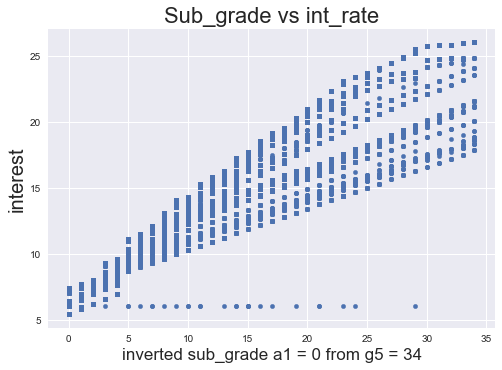

In [21]:
#scatter original data for seek some tendency
plt.scatter(ls["trs_grade"],ls["int_rate"],s=20)
plt.title("Sub_grade vs int_rate", size = 22)
plt.xlabel("inverted sub_grade a1 = 0 from g5 = 34",size=17)
plt.ylabel("interest",size=20)
plt.show()

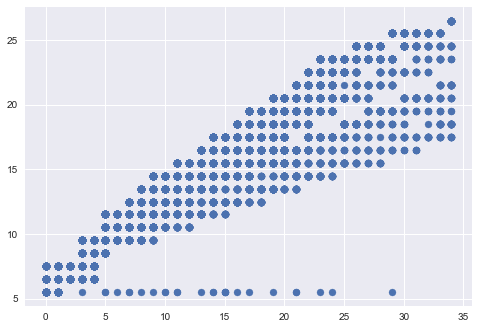

In [22]:
# draw categorized same picture
plt.scatter(ls["trs_grade"],ls["cut_intr"])
plt.show()

In [26]:

int_gr = Int_gr.pivot_table("inactive_loans" ,"cut_intr","trs_grade", aggfunc="count")


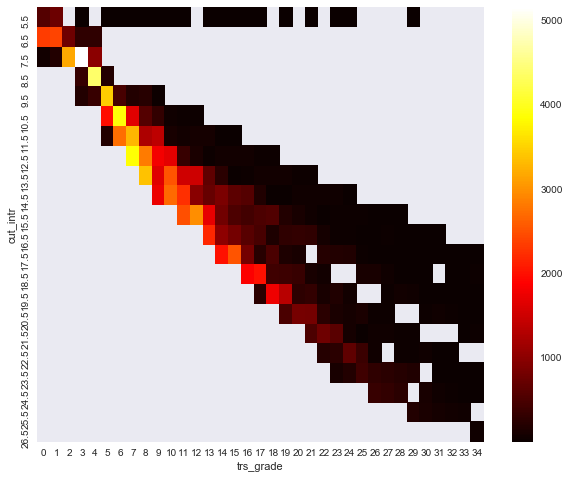

In [24]:
#heatmap for visualizing
plt.figure(figsize=(10,8))
sns.heatmap(int_gr, fmt="d", cmap="hot")
plt.show()

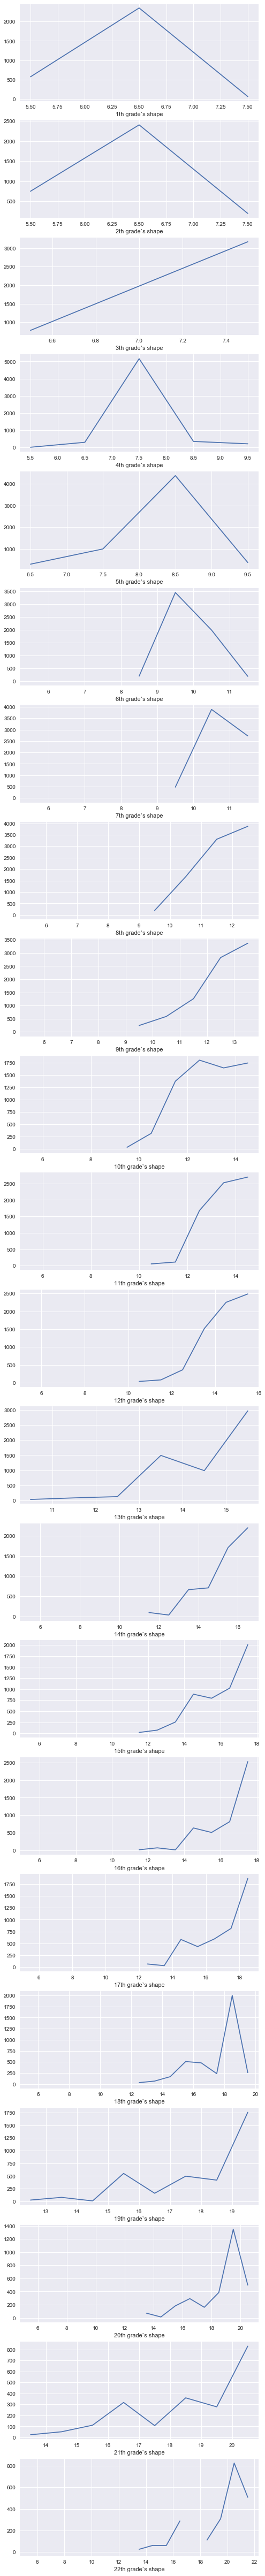

In [25]:
#draw each grades value changing.
plt.figure(figsize = (8,140))
for i in range(len(int_gr)):
    plt.subplot(35,1,i+1)
    plt.xlabel(str(i+1) + "th grade`s shape")
    plt.plot(labels, int_gr[i])
plt.show()